In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "darkgrid")
#plt.style.use("dark_background")

In [2]:
athlete_events = pd.read_csv('athlete_events.csv', encoding='utf8')
athlete_events.head() #let's have a look

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### 1. Exploratory Data Analysis

In [3]:
athlete_events.shape, athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271106 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39785 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


((271116, 15), None)

In [4]:
#how many values are missed in each column
athlete_events.isnull().sum()

ID             0
Name           0
Sex           10
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231331
dtype: int64

- At the first look, 'Age' column has unusual format, as interval data type. For this type of data it's integer expected, but it's float. There are gaps in data, so that's why pandas displays it as float.

- Also, there are gaps in 'Sex', 'Height' and 'Weight' columns. Fortunately, this data fields have no direct dependency between each other and all of those will be analysed separately, so gaps will be ignored.

In [5]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.557193,175.338970,70.702393,1978.378480
std,39022.286345,6.397129,10.518462,14.348020,29.877632
min,1.000000,6.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,100.000000,226.000000,214.000000,2016.000000


- Describing the numerical data we can see 6 and 100 years old youngest and oldest athletes. Let's check truthfulness by simple googling, and we can see that the youngest and oldest athletes are 10 and 72 y.o.

- Checking the same way min and max values for 'Height' and 'Weight' fields we can see that tallest, shortest athletes are 2.47cm, 1.36cm. The heaviest and lightest are 218kg, 31kg.

- Considering that, we can admit that this dataset has mistakes and outliers. There is no dependence between that values, so answering questions about each of them, we will clean empty values. To avoid significant results distortion, we can use data inside 95% percentiles.

In [6]:
# checking the string data
list(set(athlete_events.Name))[:10]

['Augusto Luis Cantn Portugal',
 'Raymond Brown',
 'Annesley Douglas Kingsford',
 'August Rudolf Hans Pape',
 'John Aymer Dalrymple',
 'Juan Pablo Romero Marn',
 'Andries Christiaan "Dries" Nieman',
 'Giuseppe Michielli',
 'Shukichi Mitsukuri',
 'Juan Alfonso Armenteros']

In [7]:
list(set(athlete_events.City))[:30]

['Paris',
 'Tokyo',
 'Seoul',
 'St. Louis',
 "Cortina d'Ampezzo",
 'Roma',
 'Grenoble',
 'Beijing',
 'Salt Lake City',
 'Melbourne',
 'Athina',
 'Stockholm',
 'Squaw Valley',
 'Berlin',
 'Albertville',
 'Oslo',
 'Montreal',
 'Antwerpen',
 'Los Angeles',
 'Atlanta',
 'Lillehammer',
 'Munich',
 'Calgary',
 'Chamonix',
 'Garmisch-Partenkirchen',
 'Amsterdam',
 'Barcelona',
 'Vancouver',
 'Helsinki',
 'London']

#### Names
##### As we can see, the names include some sort of nicknames (Exp: 'Joseph "Joe" McMenamin') inside the quotes and transcriptions, maiden names (Exp: 'Larysa Semenivna Latynina (Diriy-)') which are inside the brackets. 
##### Regular expression operations are good to make this data more clear.
 

In [8]:
import re

#clear names function
def names_cleaner(name: str) -> str:
    return ' '.join([c for c in re.findall(r"[\w'\"]+|[,.!?]", name) if (c[0].isalpha() == True) and (len(c) > 1)])


In [9]:
athlete_events['Name'] = athlete_events['Name'].apply(names_cleaner)
list(set(athlete_events.Name))[:10]

['Augusto Luis Cantn Portugal',
 'Raymond Brown',
 'Annesley Douglas Kingsford',
 'August Rudolf Hans Pape',
 'Lee Beom Yeong',
 'John Aymer Dalrymple',
 'Juan Pablo Romero Marn',
 'James Read',
 'Giuseppe Michielli',
 'Shukichi Mitsukuri']

#### Cities
##### In this case some cities are written with specific spelling (Exp: 'Moskva', 'Athina', 'Roma'). To make it more standardised, I will use search_cities() function from geonamescache library.

In [10]:
#list with original cities names for zipping with the list of fixed cities names

original_cities_list = list(set(athlete_events['City']))
original_cities_list[:10]

['Paris',
 'Tokyo',
 'Seoul',
 'St. Louis',
 "Cortina d'Ampezzo",
 'Roma',
 'Grenoble',
 'Beijing',
 'Salt Lake City',
 'Melbourne']

In [11]:
import geonamescache

def cities_fix_func(cities_list: list) -> list:
    fixed_cities = []
    gc = geonamescache.GeonamesCache()
    for city in cities_list:
        fixed_city = gc.search_cities(city, case_sensitive=True)
        if len(fixed_city) > 0:
            fixed_cities.append(fixed_city[0]['name'])
        else:
            fixed_cities.append(city)
    return fixed_cities


In [12]:
fixed_cities_list = cities_fix_func(original_cities_list)
fixed_cities_list[:30]

['Paris',
 'Tokyo',
 'Seoul',
 'Saint-Louis',
 "Cortina d'Ampezzo",
 'Rome',
 'Grenoble',
 'Beijing',
 'Salt Lake City',
 'Melbourne',
 'Athens',
 'Stockholm',
 'Squaw Valley',
 'Berlin',
 'Kalemie',
 'Oslo',
 'Montréal',
 'Antwerpen',
 'Los Ángeles',
 'Atlanta',
 'Lillehammer',
 'Munich',
 'Calgary',
 'Chamonix',
 'Garmisch-Partenkirchen',
 'Amsterdam',
 'Barcelona',
 'Vancouver',
 'Helsinki',
 'London']

In [13]:
cities_dictionary = dict(zip(original_cities_list, fixed_cities_list))

#replacing misspelled cities names with fixed ones
athlete_events['City'] = athlete_events['City'].map(cities_dictionary)

In [14]:
#replacing Medal NaNs with 'Choco'

athlete_events['Medal'] = athlete_events.Medal.fillna('Choco')

### 2. Who's the most successful athlete in whole Olympics history?

In [15]:
pd.DataFrame(
    athlete_events.loc[athlete_events.Medal == 'Gold'].groupby('ID').\
        agg({'Name': 'max', 'Medal': 'count'})
).sort_values(by='Medal', ascending=False).head(1)

,Name,Medal
ID,,
94406,Michael Fred Phelps II,23


##### Michael Phelps is the most success Olympian with 23 Golden medals.

### 3. The dynamics of medals distribution by country.

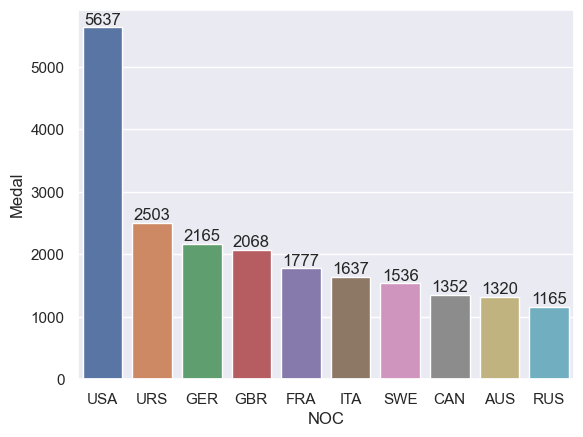

In [16]:
noc_medals_data = pd.DataFrame(
    athlete_events.loc[athlete_events.Medal != 'Choco'].groupby(athlete_events.NOC)['Medal'].\
        count().sort_values(ascending=False).reset_index().head(10)
)


bp = sns.barplot(
    data = noc_medals_data,
    x = 'NOC', 
    y = 'Medal', 
    errwidth=0
)

for i in bp.containers:
    bp.bar_label(i,)

##### We can see the impressive result of USA national olympic committee. Also Soviet Union, European countries, Australia and Canada are in TOP-10

### 4. Is there a relationship between host country of the games, athlethes country of origin and the number of medals earned?

In [17]:
# prepare data for heatmap

country_city_dependence = athlete_events.groupby(['NOC', 'City'])['Medal'].count().reset_index()
country_city_dependence.head()

,NOC,City,Medal
0,AFG,Athens,5
1,AFG,Atlanta,2
2,AFG,Beijing,4
3,AFG,Berlin,16
4,AFG,London,31


In [18]:
heat_country_city_dependence = country_city_dependence.pivot(
    index='NOC',
    columns='City',
    values='Medal'
)

heat_country_city_dependence.fillna(0, inplace=True)

#deleting rows with zero values to make result more clear
heat_country_city_dependence = heat_country_city_dependence.drop(
    heat_country_city_dependence.columns[heat_country_city_dependence.iloc[-1,:] == 0], axis = 1
)

heat_country_city_dependence

City,Amsterdam,Athens,Atlanta,Barcelona,Beijing,London,Los Ángeles,Moscow,Rio de Janeiro,Rome,Seoul,Sochi,Sydney,Tokyo
NOC,,,,,,,,,,,,,,
AFG,0.0,5.0,2.0,0.0,4.0,31.0,0.0,11.0,3.0,16.0,5.0,0.0,0.0,8.0
AHO,0.0,3.0,7.0,4.0,4.0,0.0,13.0,0.0,0.0,5.0,4.0,0.0,8.0,4.0
ALB,0.0,7.0,9.0,9.0,12.0,10.0,0.0,0.0,6.0,0.0,0.0,2.0,5.0,0.0
ALG,0.0,71.0,47.0,36.0,57.0,39.0,33.0,63.0,74.0,0.0,45.0,0.0,51.0,7.0
AND,0.0,6.0,8.0,8.0,5.0,6.0,2.0,2.0,4.0,0.0,4.0,12.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YEM,0.0,3.0,4.0,8.0,8.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0
YMD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
YUG,86.0,0.0,0.0,0.0,0.0,162.0,155.0,180.0,0.0,185.0,183.0,0.0,0.0,123.0


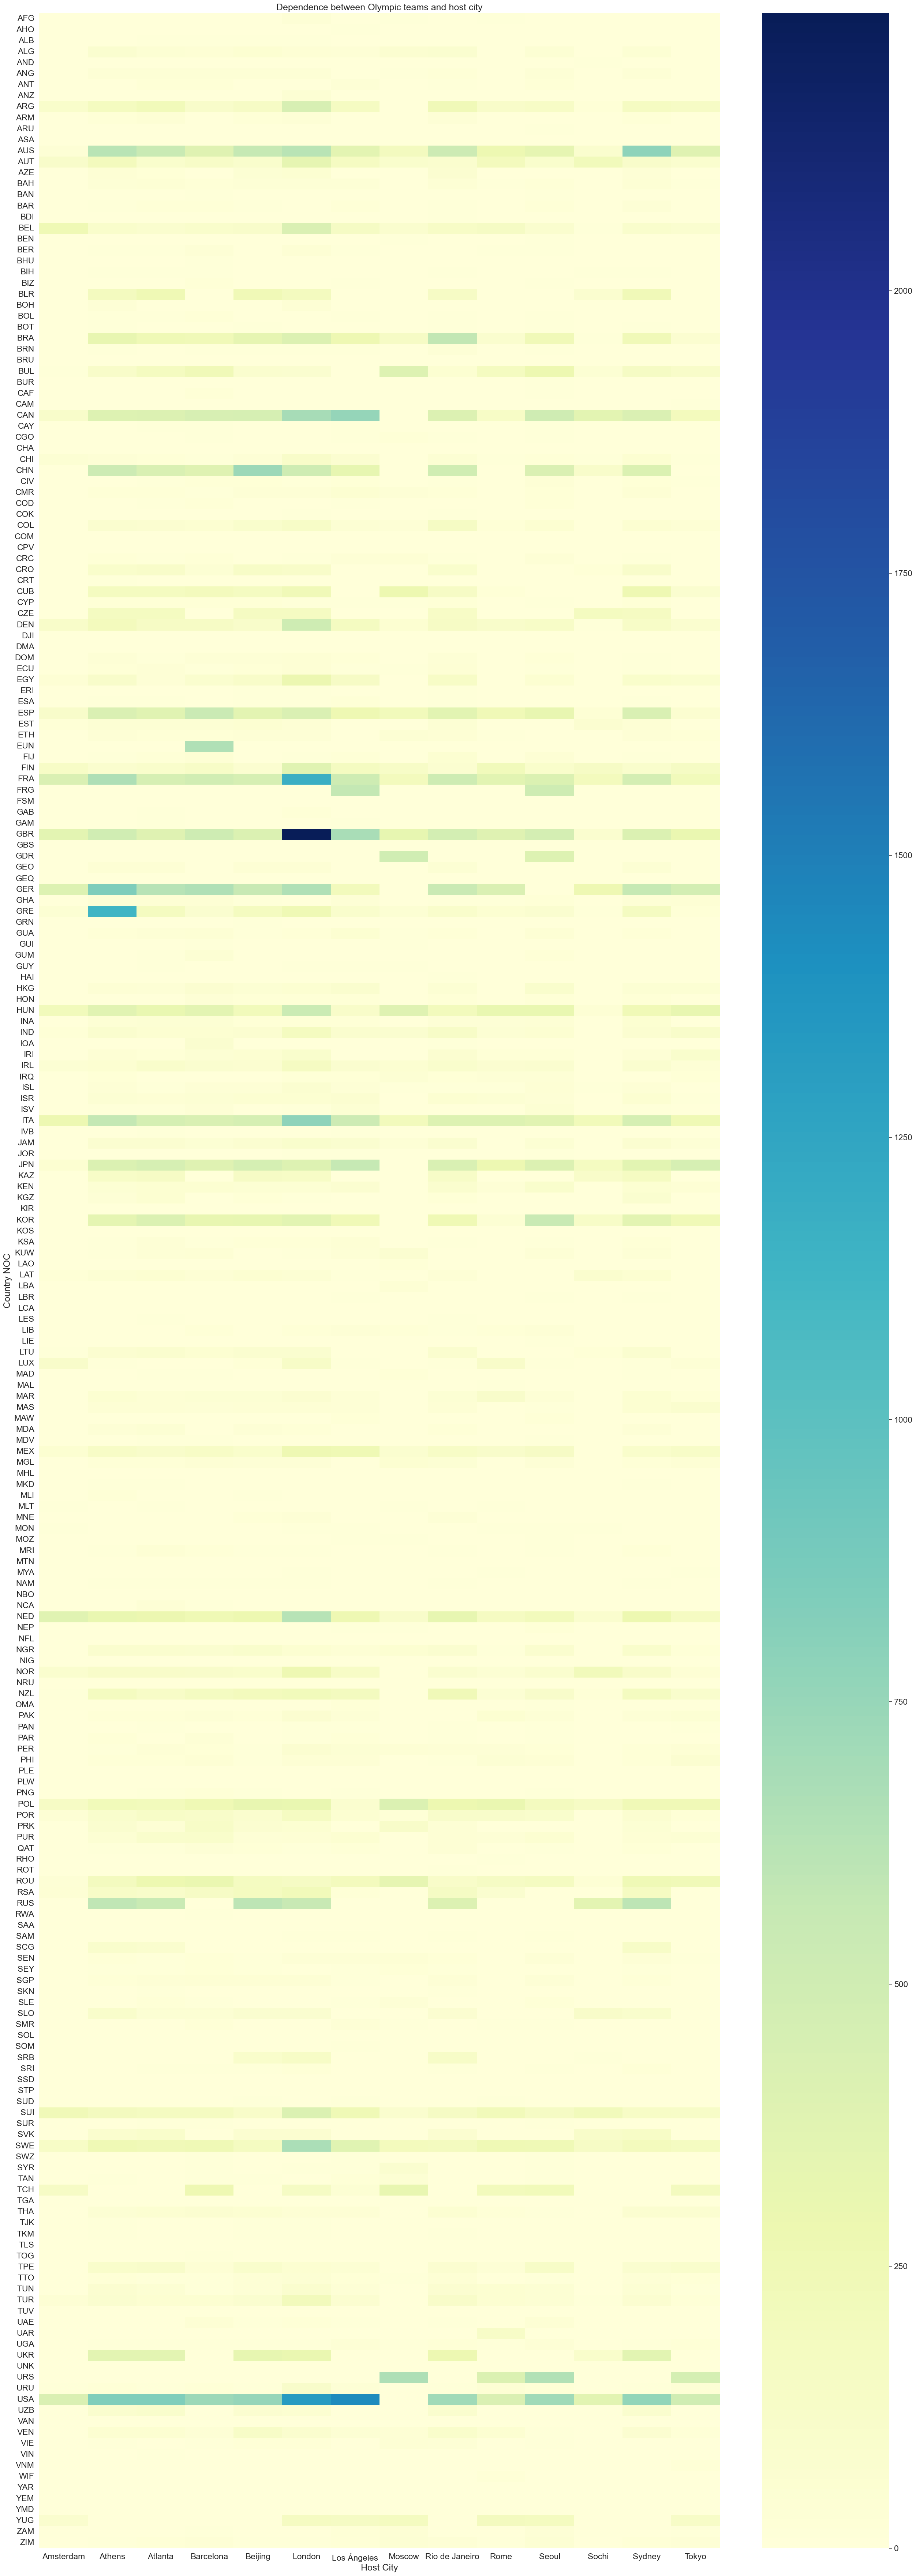

In [19]:
# building a heatmap

plt.figure(figsize=(30, 90))
sns.set(font_scale = 1.5)

sns.heatmap(
    heat_country_city_dependence, 
    annot=False, 
    cmap="YlGnBu", 
    fmt='g'
)

plt.title('Dependence between Olympic teams and host city')
plt.ylabel('Country NOC')
plt.xlabel('Host City')
plt.show()

- Although, the strong National Olympic Committees like North American, Australian, European, Russian and so on, are taking medals pretty stable in different cities, looking the heatmap, we can admit that host city affects the medal count. 
    
- National teams have greater results at their home arenas (Exp: GBR - London, USA - Los Angeles, GRE - Athens, AUS - Sydney, CHN - Beijing) and at arenas which is close to their home location (Exp: USA - London, FRA - London, CAN - Los Angeles, CHN - Sydney). 
The largest number of fans are obviously at host city and city they can easier to get to. So the fans support is crucial. 
- Another crucial factor is preparation and training.
Athletes have bigger chances to win if their training before Olympiad will be in the same arena and even the same sports equipment. Changing location requires additional adoption.

#### 5. Is there a relationship between physical data (height/weight) of athletes and 	the 	number of wins in particular discipline?


In [20]:
# creating dataframe with specific columns with cleaned empty values and cases without medal.

height_weight_df = athlete_events[athlete_events['Medal'] != 'Choco'][['ID', 'Height', 'Weight', 'Sport', 'Medal']].\
    dropna(subset=['Height', 'Weight'])

height_weight_df.head()

,ID,Height,Weight,Sport,Medal
40,16,184.0,85.0,Ice Hockey,Bronze
41,17,175.0,64.0,Gymnastics,Bronze
42,17,175.0,64.0,Gymnastics,Gold
44,17,175.0,64.0,Gymnastics,Gold
48,17,175.0,64.0,Gymnastics,Gold


In [21]:
#Group athletes by height: >180 tall, <166 short; weight: >80 heavy, <65 light

#function for height
def height_checker(x):
    if x < 166:
        return 'short'
    elif 180 > x >= 166:
        return 'medium height'
    else:
        return 'tall'

#function for weight
def weight_checker(x):
    if x < 60:
        return 'light'
    elif 80 > x >= 60:
        return 'medium weight'
    else:
        return 'heavy'

height_weight_df['Height Group'] = height_weight_df['Height'].apply(height_checker)
height_weight_df['Weight Group'] = height_weight_df['Weight'].apply(weight_checker)

height_weight_df['Height/Weight Group'] = height_weight_df['Height Group'] + "/" + \
    height_weight_df['Weight Group']

In [22]:
height_weight_pivot_prep = height_weight_df.groupby(['Height/Weight Group', 'Sport'])\
    ['Medal'].count().reset_index()
height_weight_pivot_prep.head()

,Height/Weight Group,Sport,Medal
0,medium height/heavy,Alpine Skiing,32
1,medium height/heavy,Archery,12
2,medium height/heavy,Athletics,101
3,medium height/heavy,Badminton,2
4,medium height/heavy,Baseball,46


In [23]:
height_weight_pivot = height_weight_pivot_prep.pivot(
    index='Height/Weight Group', 
    columns='Sport', 
    values='Medal'
)

In [24]:
height_weight_pivot.fillna(0, inplace=True)

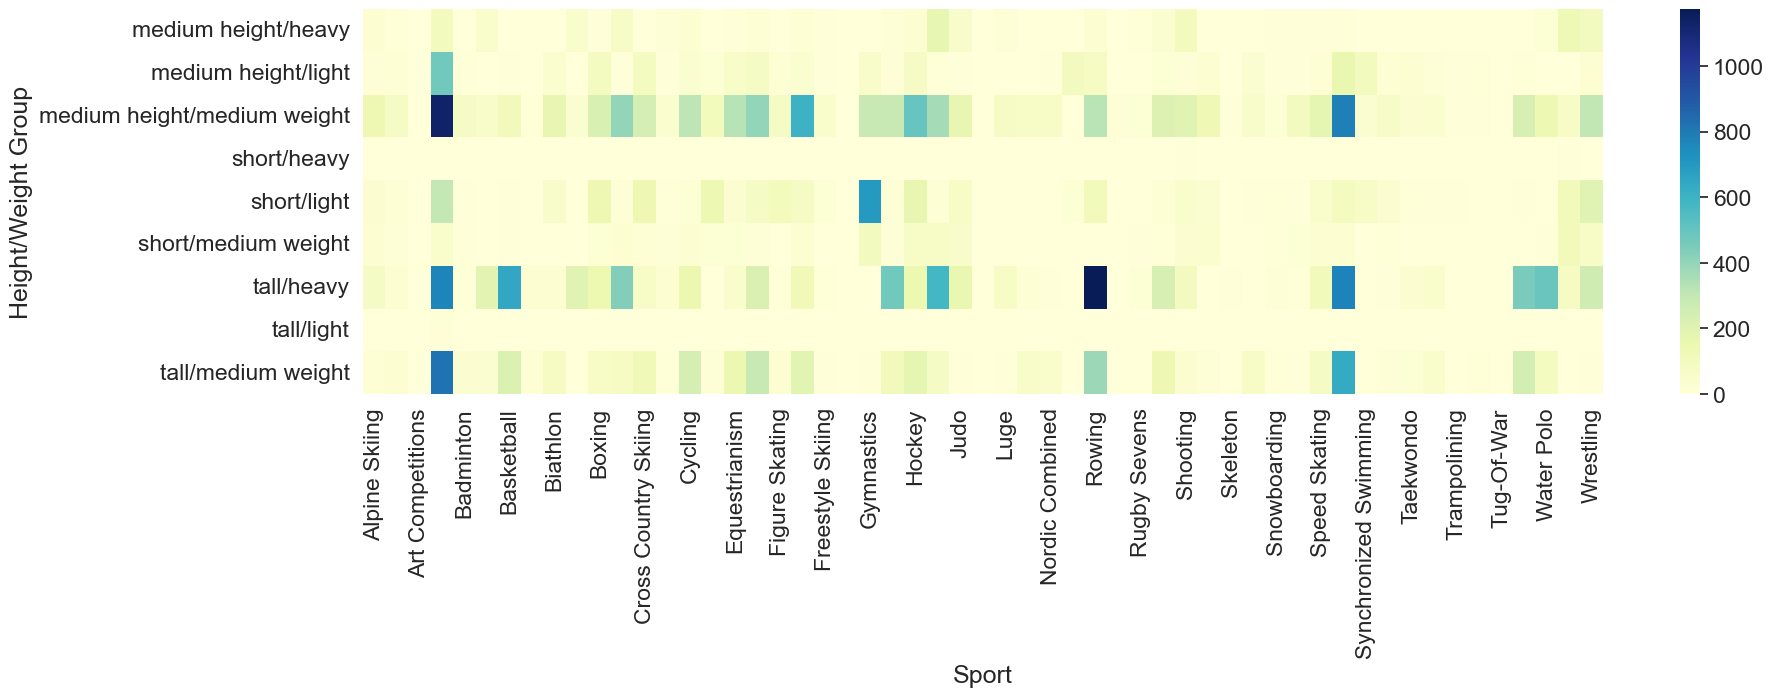

In [25]:
plt.figure(figsize=(20,5))
sns.heatmap(height_weight_pivot, 
            annot=False, 
            cmap="YlGnBu", 
            fmt='g')
sns.set(font_scale= 2)
plt.ylabel('Height/Weight Group')
plt.xlabel('Sport')
plt.show()

There are interesting patterns:
- Medium height/medium weight and the tall/heavy athletes most often win medals. While the athletes with varying height/weight parameters (like: tall/light, short/heavy, medium height/heavy) win the fewest medals.
It's crucial for athletes to abide by body mass index.

- Tall athletes which are heavy, more likely win in contact sports like Basketball, Handball, Ice Hockey, Water Polo, as well as sports where strong hands and legs give an advantage like Swimming, Rowing, Athletics, Canoeing. 

- Height can significantly influence success in sports, due to greater: strength, work capacity, reach, visibility, catching and so on.



### 6. Who is the most motivated athlete?

In [26]:
# to do that I need to get all performances for each athlete and count them till Gold medal will be reached

#performances df
athlete_performances = athlete_events[['ID', 'Year', 'Medal']]

#athletes IDs list df
athlete_ids = pd.DataFrame({'id': athlete_performances['ID'].unique()})

# performance calculation func
def performances_before_gold(athlete_id: str) -> int:
    performances = athlete_performances[athlete_performances['ID'] == athlete_id].sort_values(by='Year')
    result = performances.loc[:(performances['Medal'] == 'Gold').idxmax()]
    return result['Medal'].count() - 1 # substract 1, because last value is 'Gold'


athlete_ids['performances_count'] = athlete_ids['id'].apply(performances_before_gold)

In [27]:
athlete_ids.sort_values(by='performances_count', ascending=False).head()

,id,performances_count
106295,106296,25
45218,45219,25
13707,13708,19
63086,63087,19
129195,129196,19


In [28]:
print(
    athlete_events.set_index('ID').loc[[106296, 45219], 'Name'].unique()
)

['Heikki Ilmari Savolainen' 'Fabian Hambchen']


##### Heikki Ilmari Savolainen and Fabian Hambchen are the most motivated Olympians which performed on 25 games before taking their Gold trophy!

#### 7. How does average age of athletes change during the time?

<AxesSubplot: xlabel='Age', ylabel='ID'>

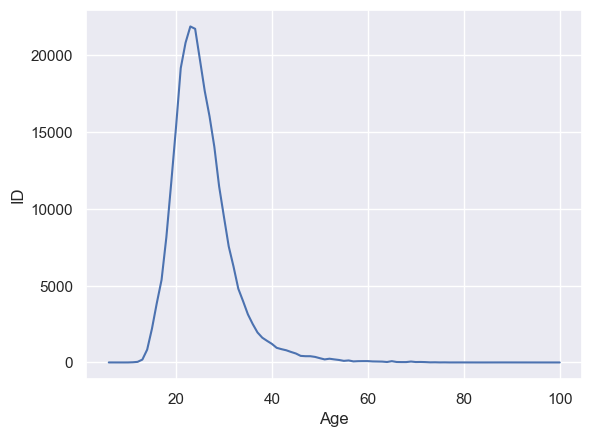

In [29]:
# checking the values distribution.

sns.set(font_scale = 1)
sns.lineplot(
    x='Age', 
    y='ID', 
    data=pd.DataFrame(athlete_events.groupby(athlete_events['Age'])['ID'].count())
)

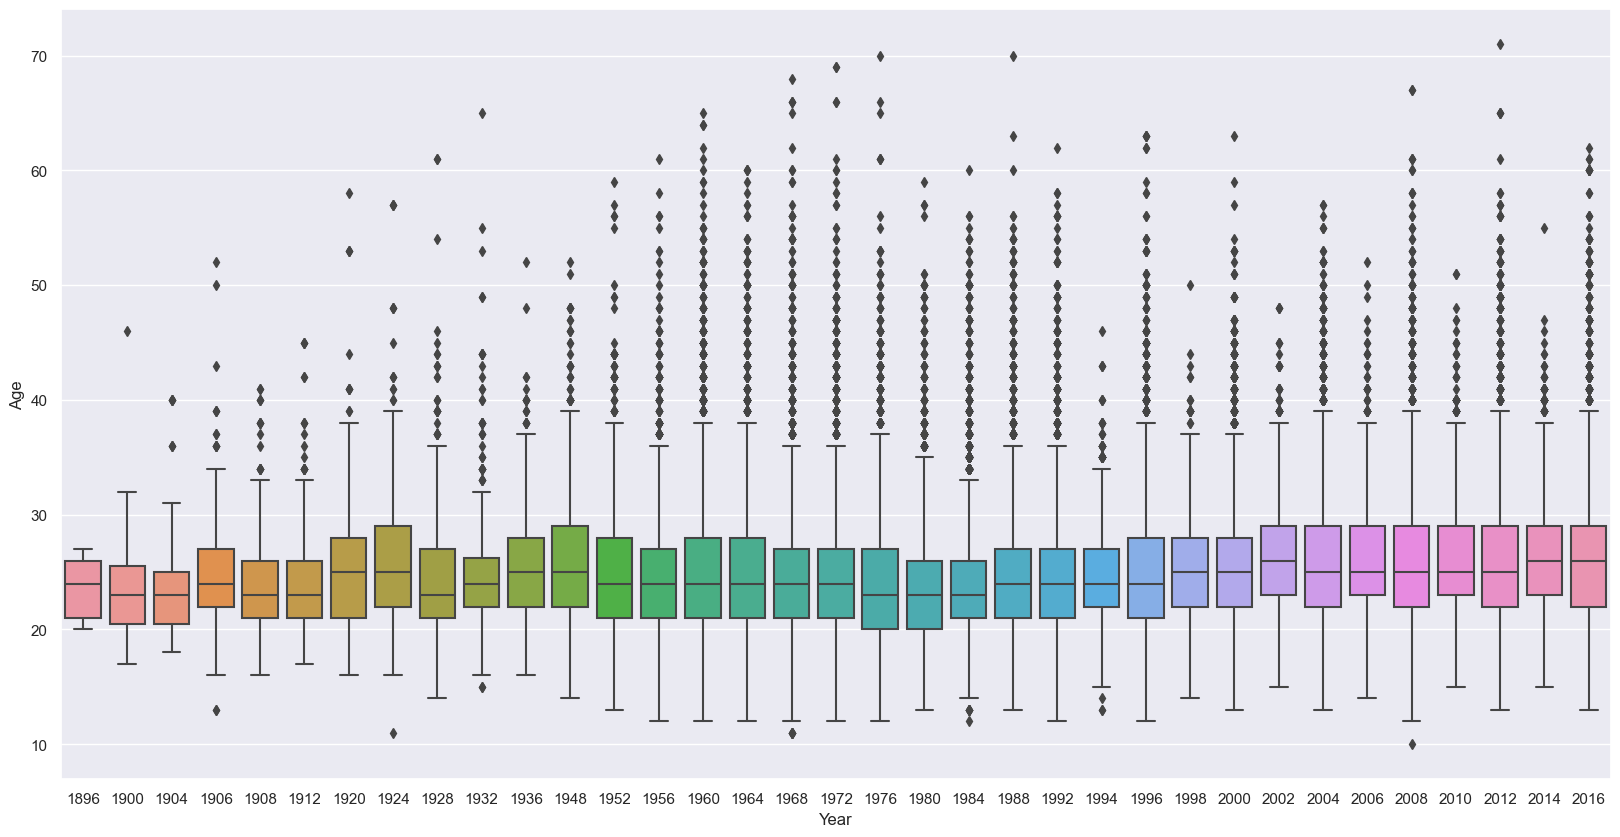

In [30]:
# Athletes age by Year distribution

plt.figure(figsize=(20,10))

sns.boxplot(
    data=athlete_events[(athlete_events['Age'] >= 10) & (athlete_events['Age'] <= 72)].dropna(), 
    y='Age', 
    x='Year'
)

plt.show()

##### As we can see, the average age of Olympic athletes decreased during the XX century. Let's have a look by Year and Sex distribution.

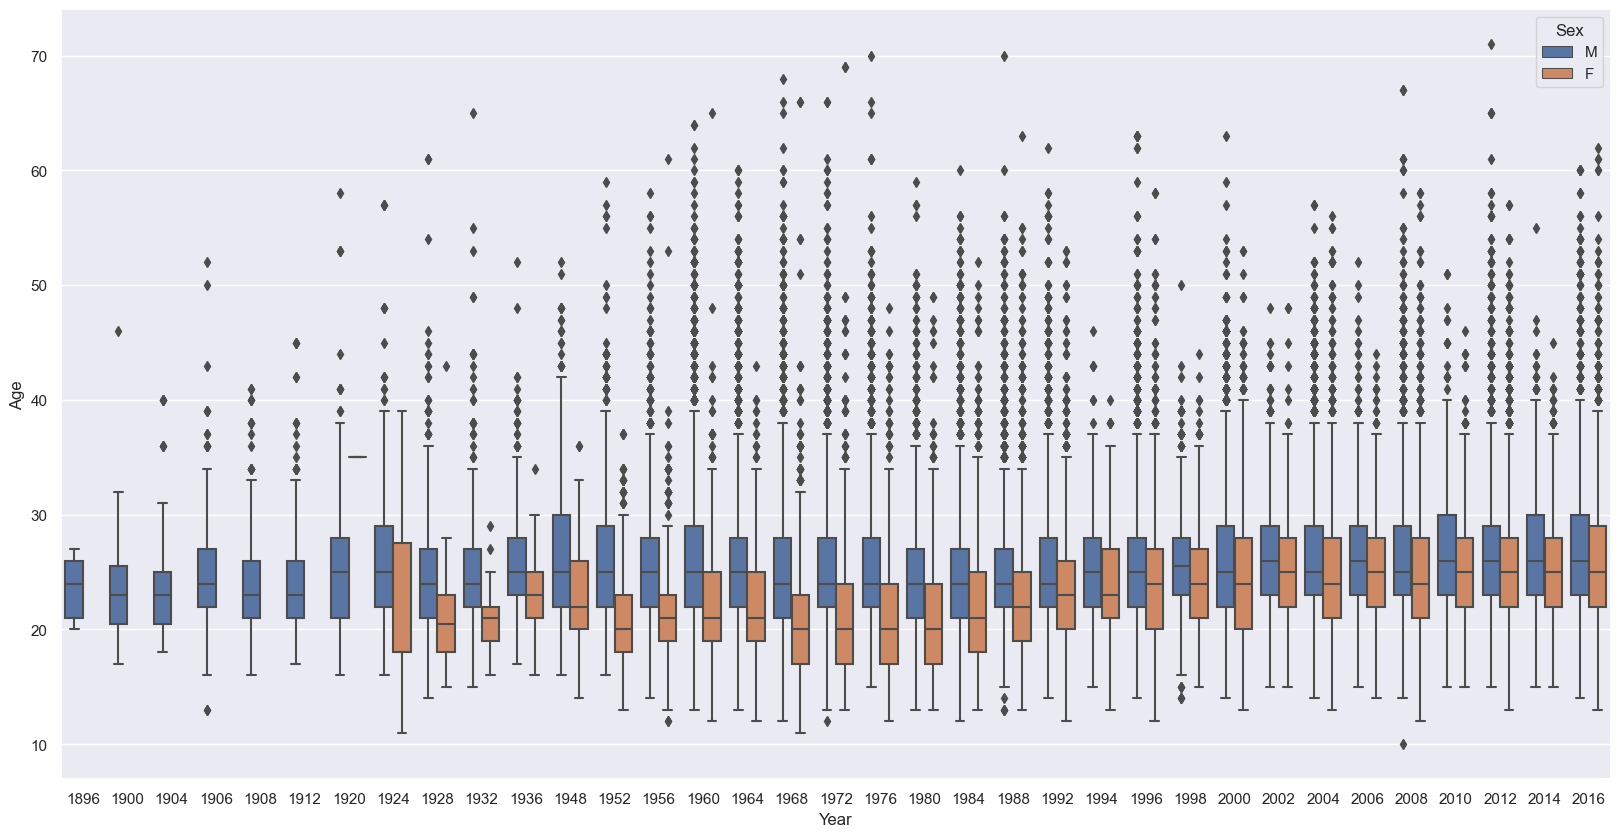

In [31]:
# Athletes age by Year and Sex distribution

plt.figure(figsize=(20,10))

sns.boxplot(
    data=athlete_events[(athlete_events['Age'] >= 10) & (athlete_events['Age'] <= 72)].dropna(), 
    y='Age', 
    x='Year', 
    hue='Sex'
)

plt.show()

- The average age of Olympians decreased due to female athletes began to take part in competitions and their average age was quite lower instead of male athletes. 
- In XXI century, when athletes selection and preparation process is systematized, male and female athletes ages are flat during the years.

#### 8. Retention

In [32]:
# Participation data

participation_dates = athlete_events[['ID', 'Year', 'Season']]
participation_dates.head()

,ID,Year,Season
0,1,1992,Summer
1,2,2012,Summer
2,3,1920,Summer
3,4,1900,Summer
4,5,1988,Winter


In [33]:
# Getting cohort dates (dates of first participation)

first_olympics = participation_dates.groupby(participation_dates.ID)['Year'].min()
first_olympics.head()

ID
1    1992
2    2012
3    1920
4    1900
5    1988
Name: Year, dtype: int64

In [34]:
# Adding cohort dates into the participation data

retention_data = pd.merge(
    participation_dates, 
    first_olympics, 
    left_on='ID', 
    right_index=True, 
    suffixes=('_participation', '_cohort')
)

retention_data.head()

,ID,Year_participation,Season,Year_cohort
0,1,1992,Summer,1992
1,2,2012,Summer,2012
2,3,1920,Summer,1920
3,4,1900,Summer,1900
4,5,1988,Winter,1988


In [35]:
# Adding cohort index

retention_data['Cohort_index'] = retention_data['Year_participation'] - retention_data['Year_cohort']
retention_data.head()

,ID,Year_participation,Season,Year_cohort,Cohort_index
0,1,1992,Summer,1992,0
1,2,2012,Summer,2012,0
2,3,1920,Summer,1920,0
3,4,1900,Summer,1900,0
4,5,1988,Winter,1988,0


In [36]:
# Concatenate Cohort year and Season to have it more clear

retention_data['Year_cohort'] = retention_data['Year_cohort'].astype(str) + " " \
    + retention_data['Season']

retention_data.drop(columns=['Season'], inplace=True)

In [37]:
cohort_data = retention_data.groupby(['Year_cohort', 'Cohort_index'])['ID'].nunique().reset_index()

cohort_pivot = cohort_data.pivot(
    index='Year_cohort', 
    columns='Cohort_index', 
    values='ID'
)

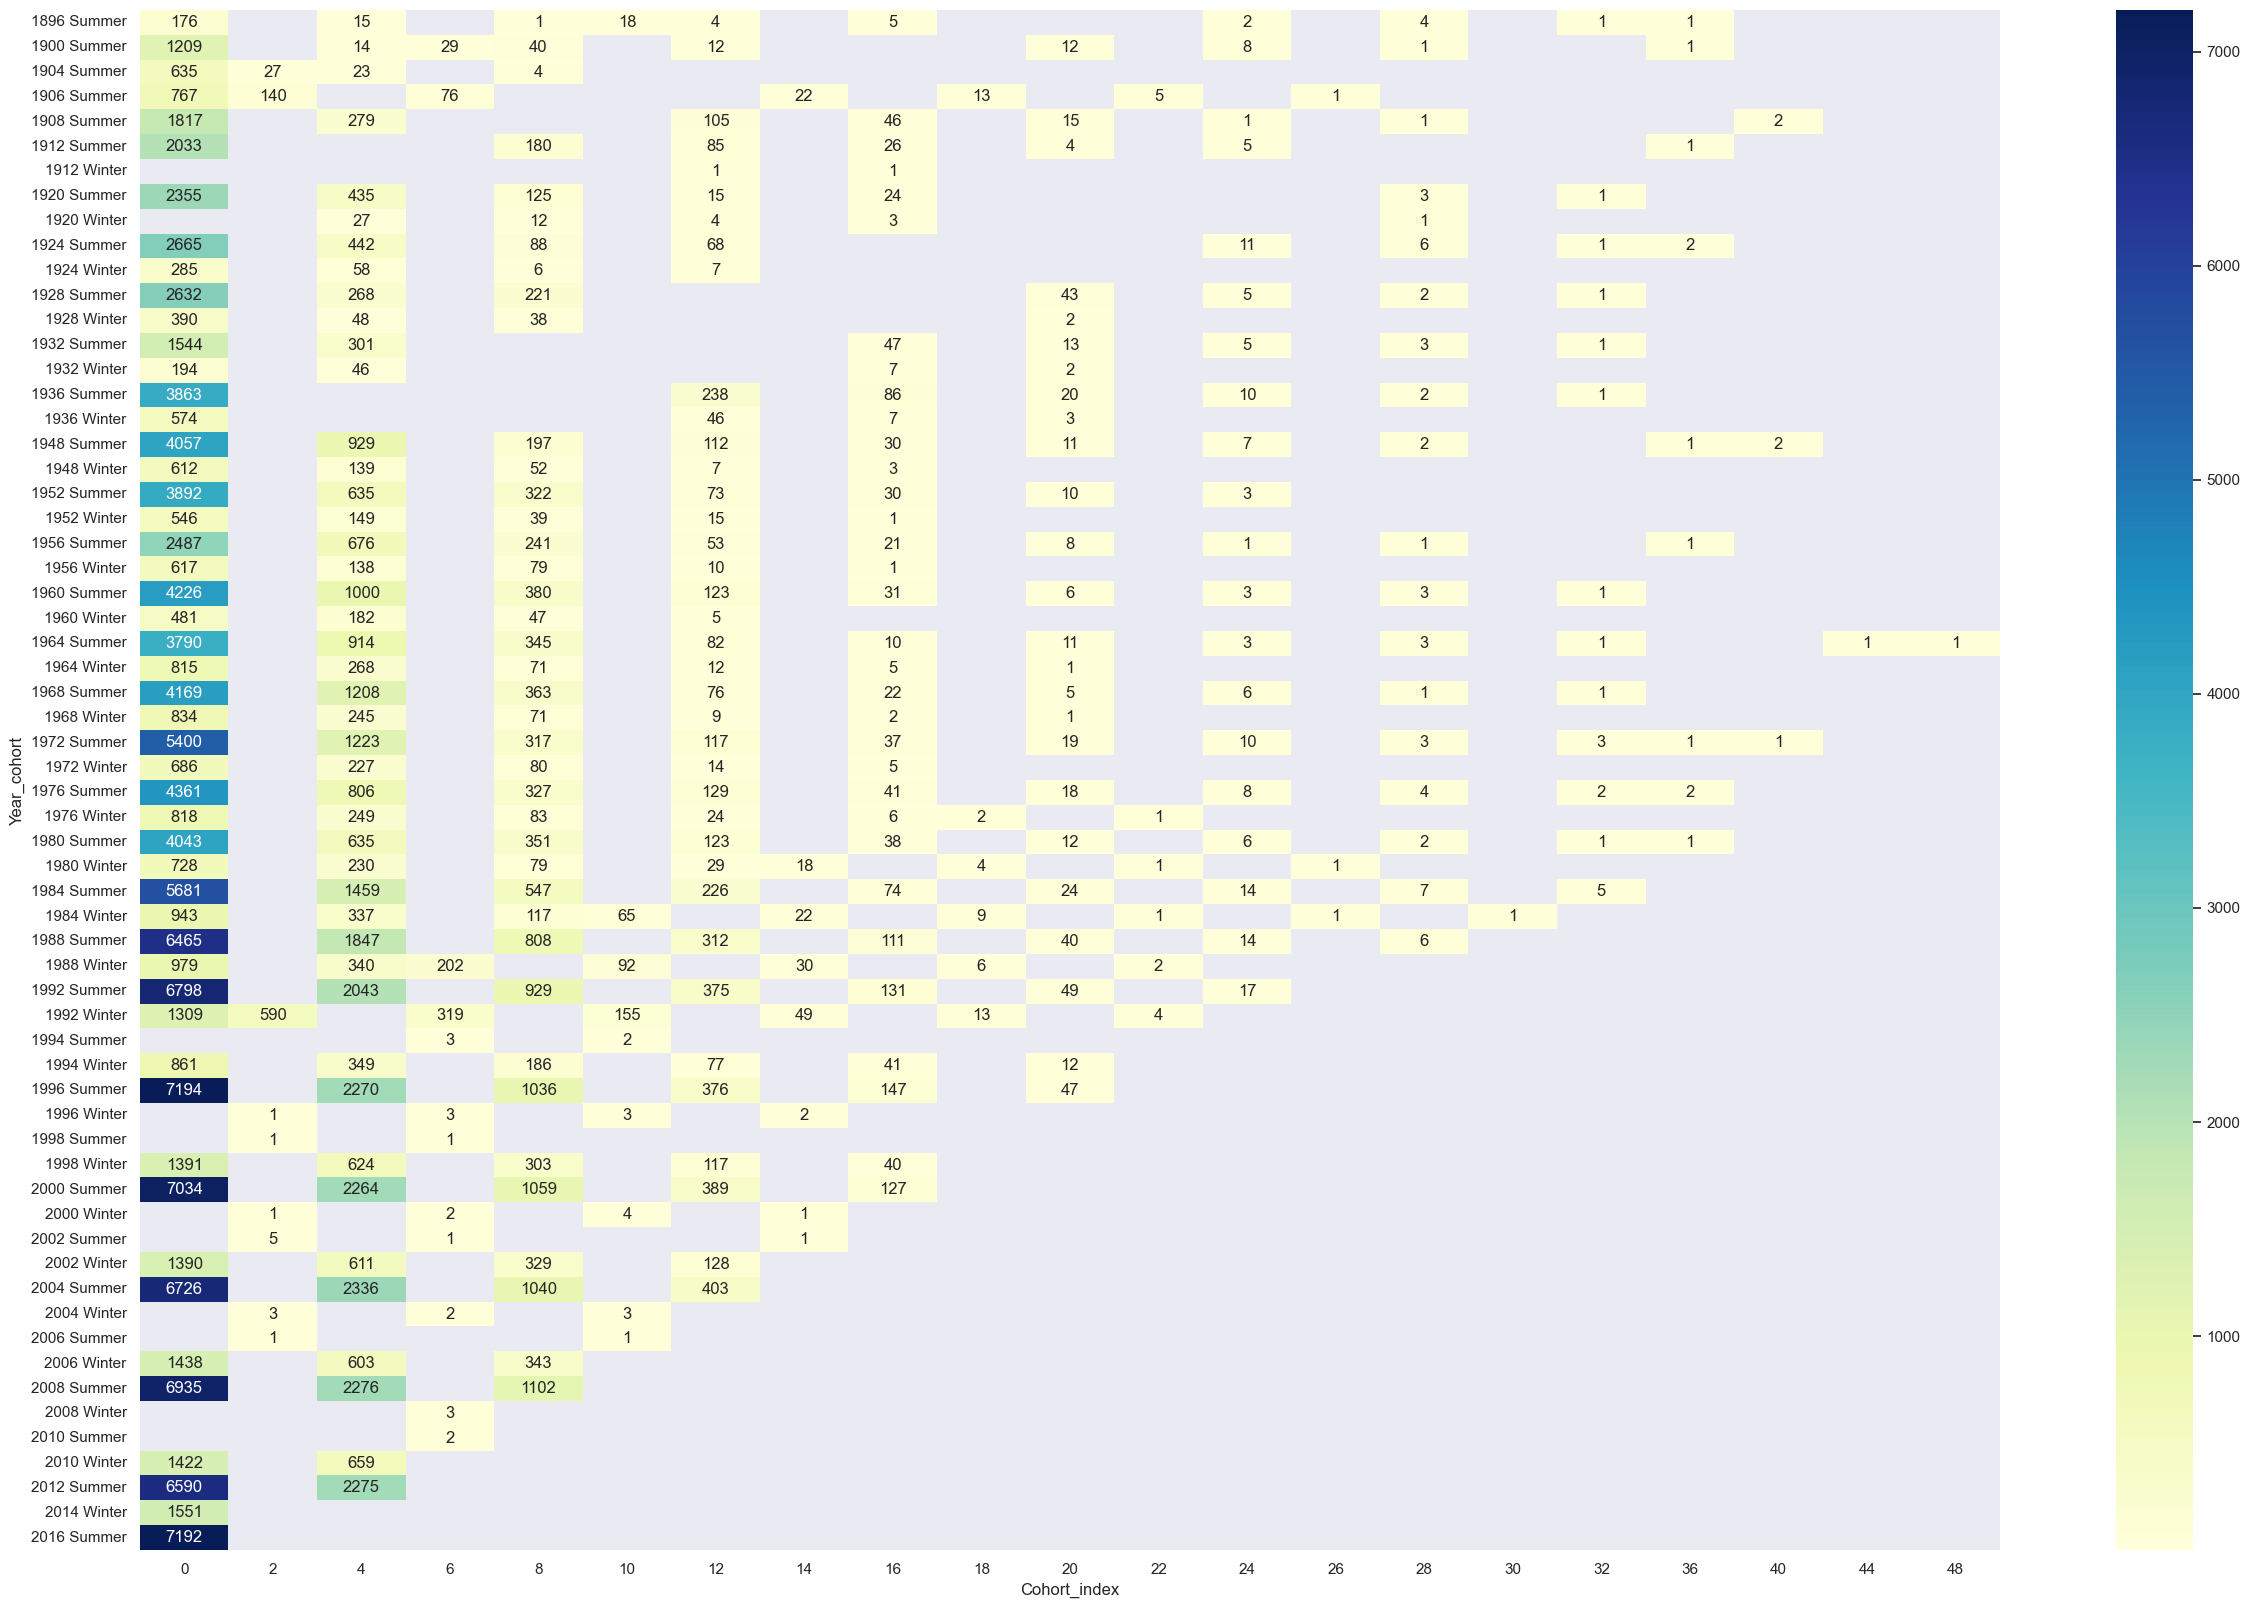

In [38]:
plt.figure(figsize=(30,20))
sns.heatmap(cohort_pivot, 
            annot=True, 
            cmap="YlGnBu", 
            fmt='g')
sns.set(font_scale= 1.4)
plt.show()


In [39]:
#getting the shares

cohort_pivot_shares = cohort_pivot.divide(cohort_pivot.iloc[:,0], axis=0)

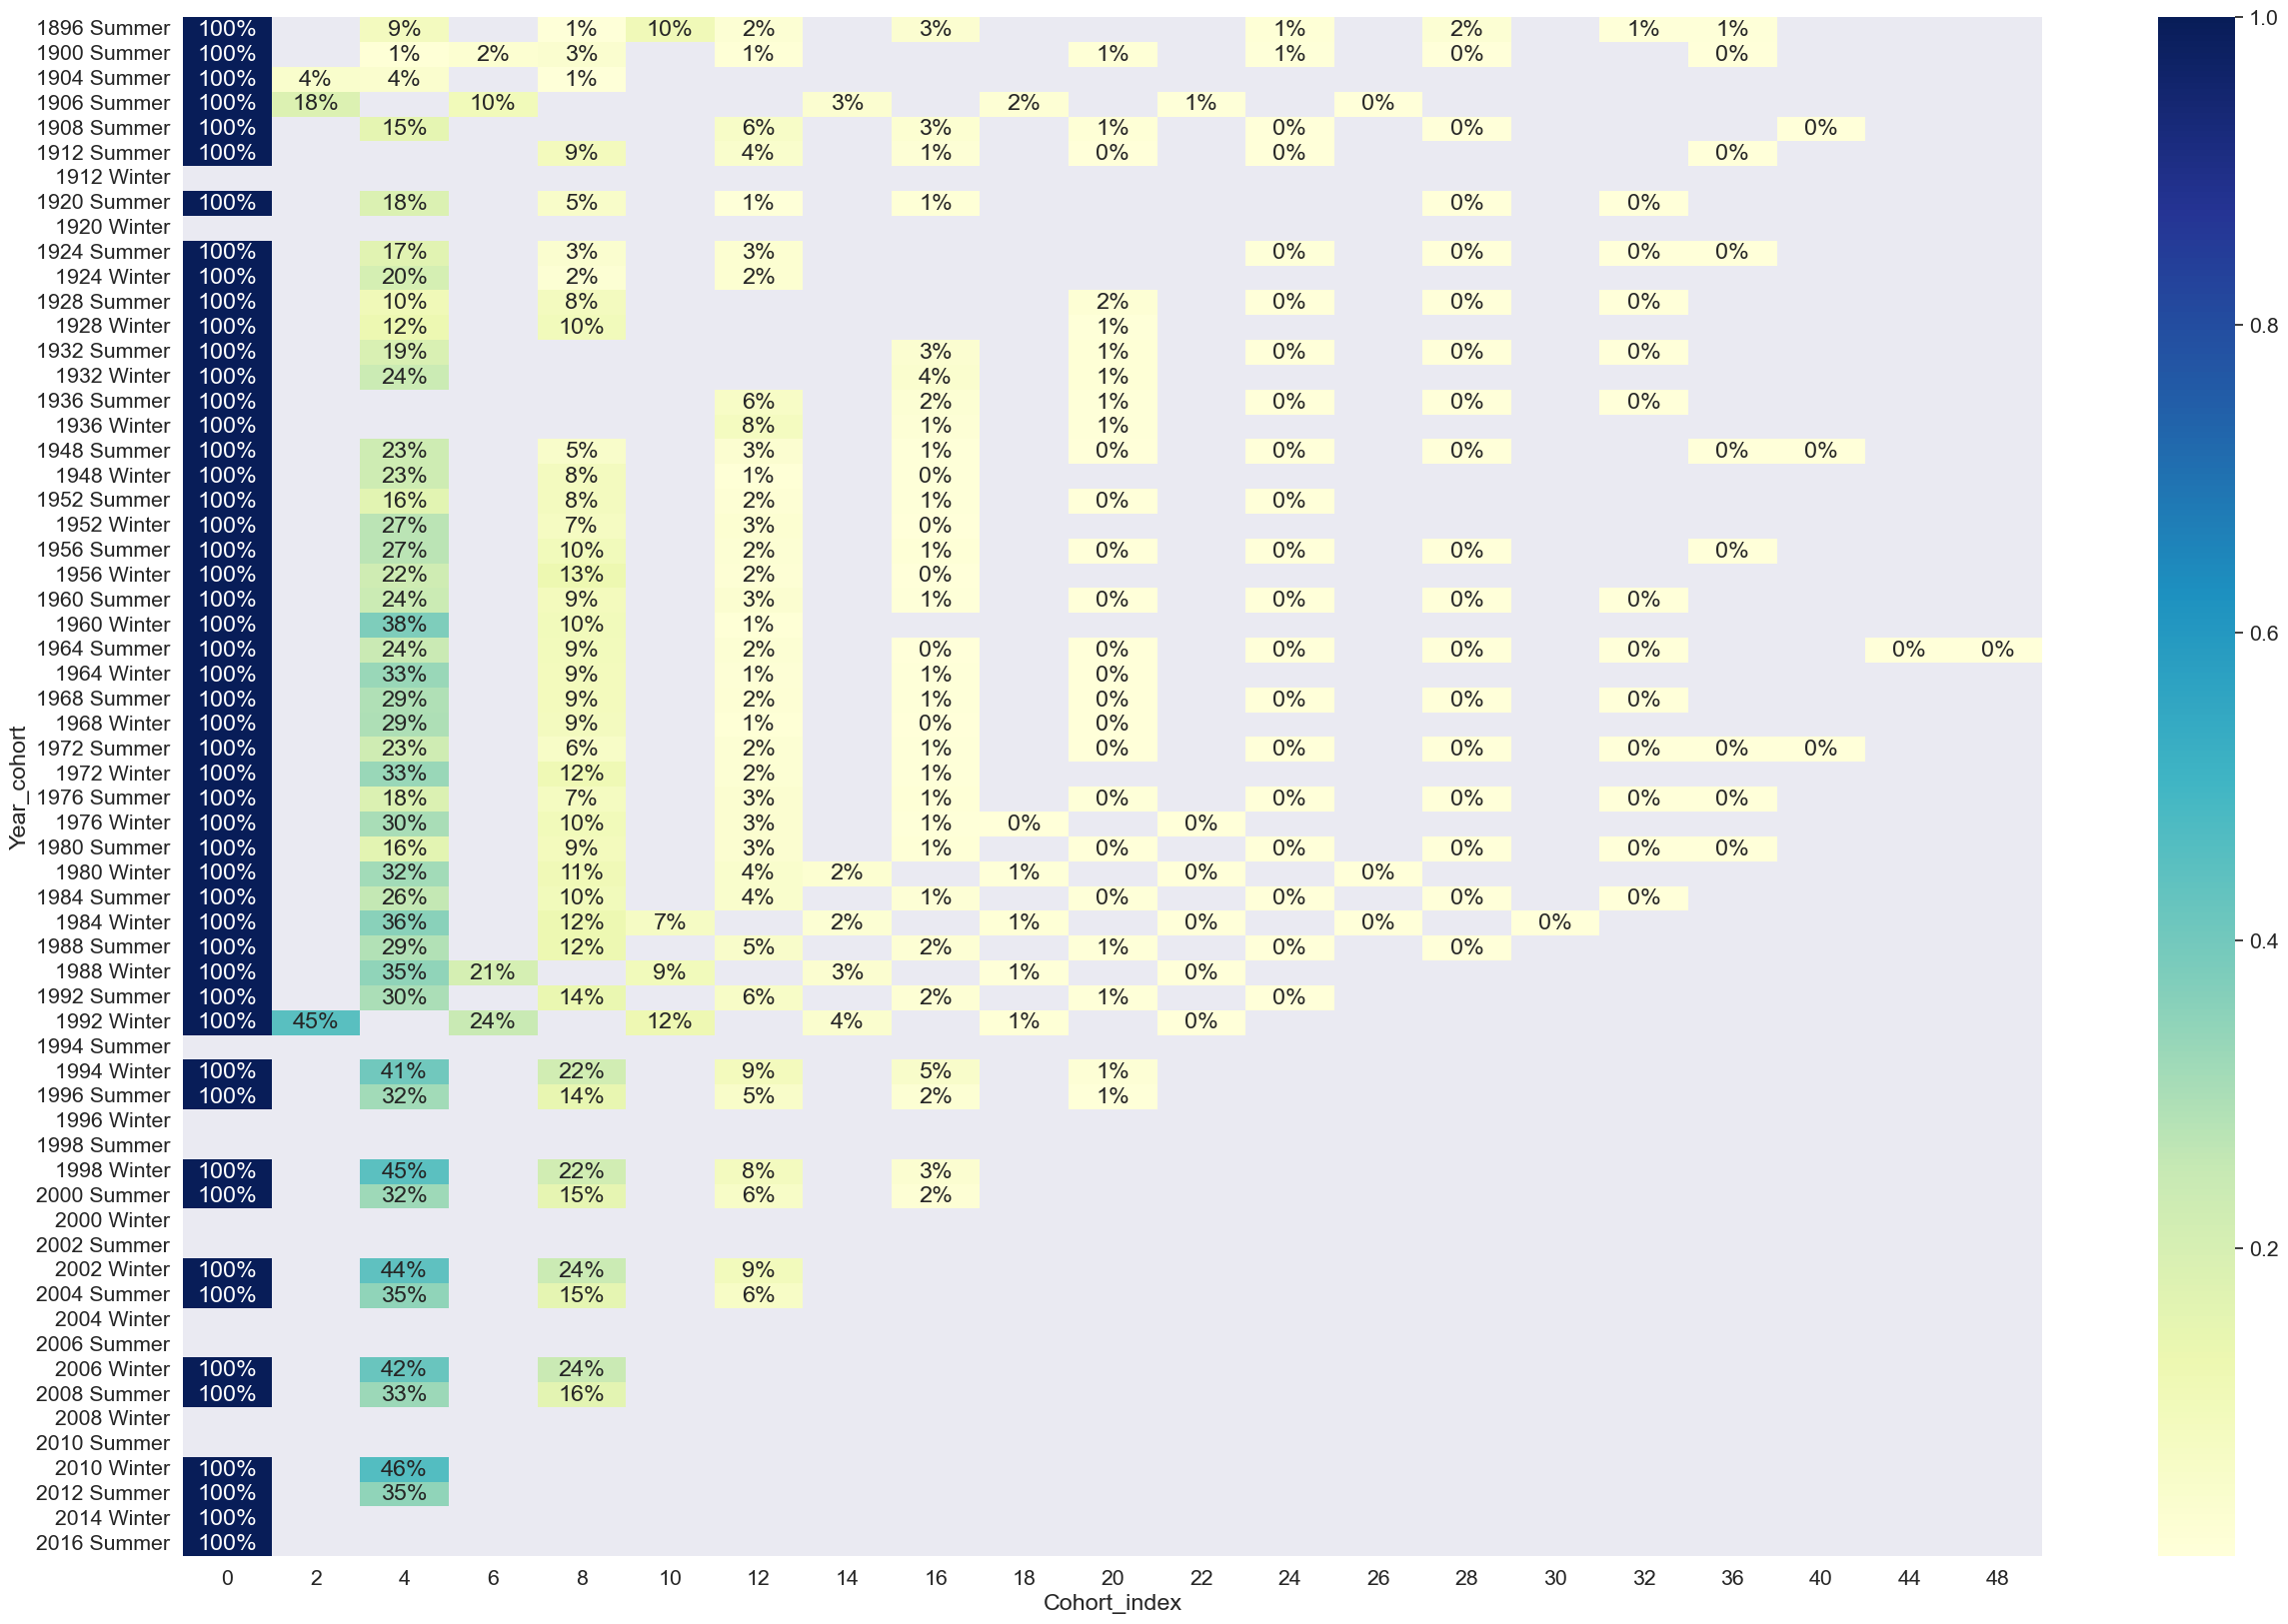

In [40]:
plt.figure(figsize=(30,20))
sns.heatmap(cohort_pivot_shares, 
            annot=True, 
            cmap="YlGnBu", 
            fmt='.0%')
plt.show()

1. The share of athletes who is back on the next games growing every event. That says about training and athletes preparation improvement. Since the 1994 around 45% of athletes are back to the next Winter games and around 35% are back to the next Summer games. The cohort survival rate decreases approximately a half with the next event.
2. The athletes number increasing along the 20th century due to growing popularity in other countries and including of new disciplines.
3. There are athletes who participating Games for more than 40 years. It's impressive. For sure, it's participants from less mobile sports like Shooting.
4. Since the 1994 Winter and Summer Games are not performed at the same year and each type of event are alternate at intervals of two years.
5. The Winter Games are less participated due to the times less of disciplines number. Also, 1906 Games has fewer participants being intercalated.